190.10452029421165


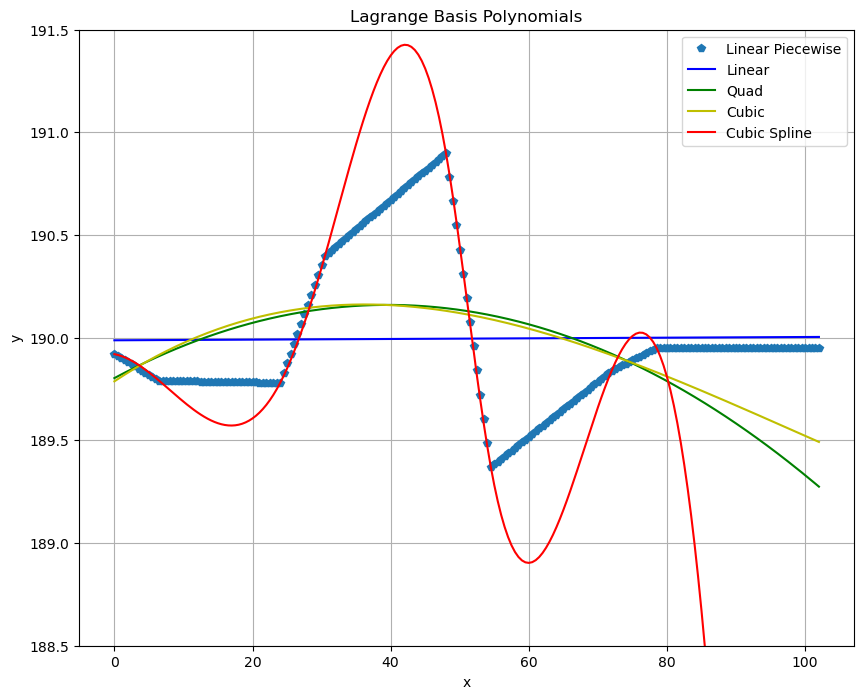

Linear Piecewise Closing Price Guess: 189.95
Linear Interoplation Closing Price Guess: 190.00389575669442
Quadratic Interpolation Closing Price Guess: 189.2604861801115
Cubic Polynomial Interpolation Closing Price Guess: 189.48510318492197
Cubic Spline Interpolation Closing Price Guess: 171.58907458255047


In [14]:
import numpy as np
from scipy.interpolate import CubicSpline, interp1d
import matplotlib.pyplot as plt

aapl_close_prices = [189.92, 189.79, 189.78, 190.40, 190.90, 189.37, 189.84, 189.95]
xs = [0, 6.5, 24, 30.5, 48, 54.5, 72, 78.5]
half_hours = [.5*i for i in range(205)]

#Creates Linear Piecewise
linear_piecwise = np.interp(x=half_hours, xp=xs, fp=aapl_close_prices)

#Creates Linear Interoplation 
linear_coef = np.polyfit(xs, aapl_close_prices, 1)
prices_linear = np.polyval(linear_coef, half_hours)

#Creates Quadratic interpolation
quad_coef = np.polyfit(xs, aapl_close_prices, 2)
prices_quad = np.polyval(quad_coef, half_hours)

#Creates Cubic Polynomial interpolation
cube_coef = np.polyfit(xs, aapl_close_prices, 3)
prices_cube = np.polyval(cube_coef, half_hours)

#Creates Cubic Spline Interpolation
cubic_spline = CubicSpline(xs, aapl_close_prices, extrapolate=True)
prices_cubic = cubic_spline(half_hours)

fig = plt.figure(figsize = (10,8))

print(np.polyval(quad_coef, 24))

#Linear Piecwise Interp
plt.plot(half_hours, linear_piecwise, 'p', label = 'Linear Piecewise')

#Polynomial Interpolations
plt.plot(half_hours, prices_linear, 'b', label = 'Linear')
plt.plot(half_hours, prices_quad, 'g', label = 'Quad')
plt.plot(half_hours, prices_cube, 'y', label = 'Cubic')

#Cubic Spline Interpolation
plt.plot(half_hours, prices_cubic, 'r', label = 'Cubic Spline')

plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.ylim(188.5, 191.5)
plt.show()

print("Linear Piecewise Closing Price Guess: "+str(np.interp(x=102.5, xp=xs, fp=aapl_close_prices)))
print("Linear Interoplation Closing Price Guess: "+str(np.polyval(linear_coef, 102.5)))
print("Quadratic Interpolation Closing Price Guess: "+str(np.polyval(quad_coef, 102.5)))
print("Cubic Polynomial Interpolation Closing Price Guess: "+str(np.polyval(cube_coef, 102.5)))
print("Cubic Spline Interpolation Closing Price Guess: "+str(cubic_spline(102.5)))